# FIFA Player Stats Analysis and Prediction

This project involves analyzing and predicting FIFA player stats using a dataset from Kaggle. The dataset contains various attributes of FIFA players, including their age, overall rating, potential, special skills, and more.

## Purpose
The purpose of this project is to build a machine learning model that can predict whether a player is 'Good' (Best Overall Rating >= 75) based on their attributes. This can help in identifying promising players and making informed decisions in team management and player scouting.

## Workflow
1. **Load Data**: Load the dataset into a pandas DataFrame.
2. **Preprocessing and Data Cleaning**: Handle missing values by filling them with the mean or dropping columns with too many missing values.
3. **Feature Selection**: Select relevant features for the machine learning model.
4. **Data Splitting**: Split the data into training and test sets.
5. **Feature Scaling**: Scale the features using StandardScaler.
6. **Model Building**: Build a logistic regression model to predict whether a player is 'Good' (Best Overall Rating >= 75).
7. **Model Training**: Train the model using the training data.
8. **Model Evaluation**: Evaluate the model using accuracy and F1 score metrics.

## Results
- **Accuracy**: 0.9869
- **F1 Score**: 0.9868

The project demonstrates the process of data cleaning, feature selection, model building, and evaluation using a real-world dataset. The high accuracy and F1 score indicate that the model performs well in predicting whether a player is 'Good' based on their attributes.

# Import Library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

data from: https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?resource=download

# Load Data
Load the dataset into a pandas DataFrame.

In [12]:
data = pd.read_csv('FIFA17_official_data.csv')
data

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17555,233215,C. Addai,18,https://cdn.sofifa.com/players/233/215/17_60.png,Ghana,https://cdn.sofifa.com/flags/gh.png,54,72,Coventry City,https://cdn.sofifa.com/teams/1800/light_30.png,...,8.0,13.0,13.0,51.0,51.0,48.0,59.0,60.0,GK,53.0
17556,232911,R. Kamiyama,31,https://cdn.sofifa.com/players/232/911/17_60.png,Japan,https://cdn.sofifa.com/flags/jp.png,57,57,Avispa Fukuoka,https://cdn.sofifa.com/teams/113186/light_30.png,...,6.0,10.0,11.0,59.0,46.0,41.0,62.0,59.0,GK,56.0
17557,235387,B. Gaye,18,https://cdn.sofifa.com/players/235/387/17_60.png,Germany,https://cdn.sofifa.com/flags/de.png,53,67,DSC Arminia Bielefeld,https://cdn.sofifa.com/teams/159/light_30.png,...,9.0,13.0,12.0,54.0,50.0,49.0,54.0,58.0,GK,52.0
17558,237904,K. Olifirenko,18,https://cdn.sofifa.com/players/237/904/17_60.png,Russia,https://cdn.sofifa.com/flags/ru.png,50,66,FC Tom Tomsk,https://cdn.sofifa.com/teams/110233/light_30.png,...,8.0,13.0,13.0,47.0,59.0,52.0,44.0,49.0,GK,49.0


# Preprocessing and Data Cleaning
Handle missing values by filling them with the mean or dropping columns with too many missing values.

In [13]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Fill missing values or drop columns

# fill missing numerical values with the mean and drop columns with too many missing values
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'float64' or data[column].dtype == 'int64':
            data[column].fillna(data[column].mean(), inplace=True)
        else:
            data.drop(columns=[column], inplace=True)

# Verify that there are no more missing values
print(data.isnull().sum())

Club                      243
Position                   19
Jersey Number              19
Joined                   1695
Loaned From             16227
Contract Valid Until      362
dtype: int64
ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club Logo                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Jersey Number               0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                    

/var/folders/kj/qd6f5j_d3ss0gnm3b2jcqslh0000gn/T/ipykernel_56974/2401703685.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


## Define Target Output that Good >= 75

In [14]:
# Define the target output (Good >= 75)
data['Good'] = data['Best Overall Rating'] >= 75

## Feature Selections
Select relevant features for the machine learning model.

In [15]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Jersey Number', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Good'],
      dtype='object')

In [16]:
# Identify the features you will use in your model
ml_features = ['Age', 'Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves']

## Data Splitting
Split the data into training and test sets.

In [17]:
# Split data into training set and test set
X = data[ml_features]
y = data['Good']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling
Scale the features using StandardScaler.

In [18]:
# Scale the features (if needed, optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building Model
Build a logistic regression model to predict whether a player is 'Good' (Best Overall Rating >= 75).

## Model Training
Train the model using the training data.

In [19]:
# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test_scaled)

## Model Evaluation
Evaluate the model using accuracy and F1 score metrics.

In [20]:
# Evaluate the model
ml_accuracy = accuracy_score(y_test, y_pred)
ml_f1_score = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']

print(f"Accuracy: {ml_accuracy}")
print(f"F1 Score: {ml_f1_score}")

Accuracy: 0.9869020501138952
F1 Score: 0.9867771126169035


In [31]:
# Add predictions to the original dataframe
data['Predicted_Good'] = model.predict(scaler.transform(data[ml_features]))

# Display the first few rows to see the results
data[['Name', 'Best Overall Rating', 'Good', 'Predicted_Good']].head()

,Name,Best Overall Rating,Good,Predicted_Good
0,L. Suárez,88.0,True,True
1,R. Nainggolan,84.0,True,True
2,A. Vidal,85.0,True,True
3,D. Alaba,84.0,True,True
4,P. Pogba,85.0,True,True


In [28]:
predicted_good_counts = data['Predicted_Good'].value_counts()
print(predicted_good_counts)

Predicted_Good
False    15937
True      1623
Name: count, dtype: int64


/var/folders/kj/qd6f5j_d3ss0gnm3b2jcqslh0000gn/T/ipykernel_56974/470460455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=predicted_good_counts.index, y=predicted_good_counts.values, palette='viridis')


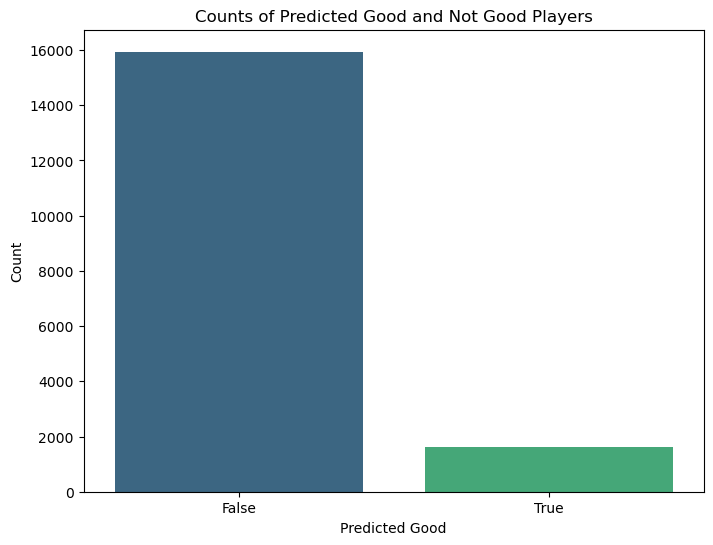

In [32]:
# Plot the counts of predicted good and not good players
plt.figure(figsize=(8, 6))
sns.barplot(x=predicted_good_counts.index, y=predicted_good_counts.values, palette='viridis')
plt.xlabel('Predicted Good')
plt.ylabel('Count')
plt.title('Counts of Predicted Good and Not Good Players')
plt.show()

In [34]:
# Calculate the percentage of similarity between 'Good' and 'Predicted_Good'
similarity_percentage = (data['Good'] == data['Predicted_Good']).mean() * 100
print(f"Similarity Percentage: {similarity_percentage:.2f}%")

Similarity Percentage: 98.86%
